<a href="https://colab.research.google.com/github/aronnly/Dados_do_Airbnb/blob/main/%5BTemplate%5D_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Paris*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="50%" src="https://notaalta.espm.br/wp-content/uploads/2018/04/airbnb_paris.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Paris, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2022-01-08/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - identificacao do imovel
* `name` - nome da propriedade 
* `host_id` - número gerado para identificar o host
* `host_name` - nome do host
* `neighbourhood_group` - nenhum valor valido
* `neighbourhood` - nome do bairro
* `latitude`
* `longitude`
* `room_type` - tipo de locação
* `price` - preço
* `minimum_nights` - número mínimo de noites contratadas
* `number_of_reviews` - número de avaliações
* `last_review` - data da última avaliação
* `reviews_per_month` - número de avaliações por mês
* `calculated_host_listings_count` - quantidade de imoveis do mesmo host
* `availability_365` - disponibilidade por ano


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,80,2,277,2022-01-04,1.82,1,66,45,7510402838018
1,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,105,10,290,2021-12-30,2.21,4,212,20,7510400829623
2,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.04,1,365,0,7510903576564
3,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,148,0,"Available with a mobility lease only (""bail mo..."
4,9952,Paris petit coin douillet,33534,Elisabeth,NaN,Popincourt,48.86373,2.37093,Entire home/apt,80,4,34,2021-12-28,0.32,1,212,8,7511101582862


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

print("O numero de entradas é {}, divididas em {} variaveis".format(df.shape[0],df.shape[1]))

# verificar as 5 primeiras entradas do dataset
df.dtypes

O numero de entradas é 49255, divididas em 18 variaveis


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(pd.isna(df).sum()/df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
license                           0.427936
reviews_per_month                 0.208182
last_review                       0.208182
name                              0.000873
host_name                         0.000568
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

###Tratando os *outliers*
Aqui, é evidente que precisaremos excluir a coluna `neighbourhood_group`. 

Além disso, vamos ver a melhor maneira de tratar esses dados ausentes de forma que o percentual tenha o menor impacto possível. Em termos práticos, algo com 1% ou menos de dados ausentes.

Por fim, veremos em quais variáveis há influência/possibilidade de *outliers* com as distribuições de frequência abaixo. 

In [ ]:
# excluindo a coluna "neighbourhood_group"
df2 = df.drop(columns = ['neighbourhood_group'])

#### **Q3. Qual o tipo de distribuição das variáveis?** 

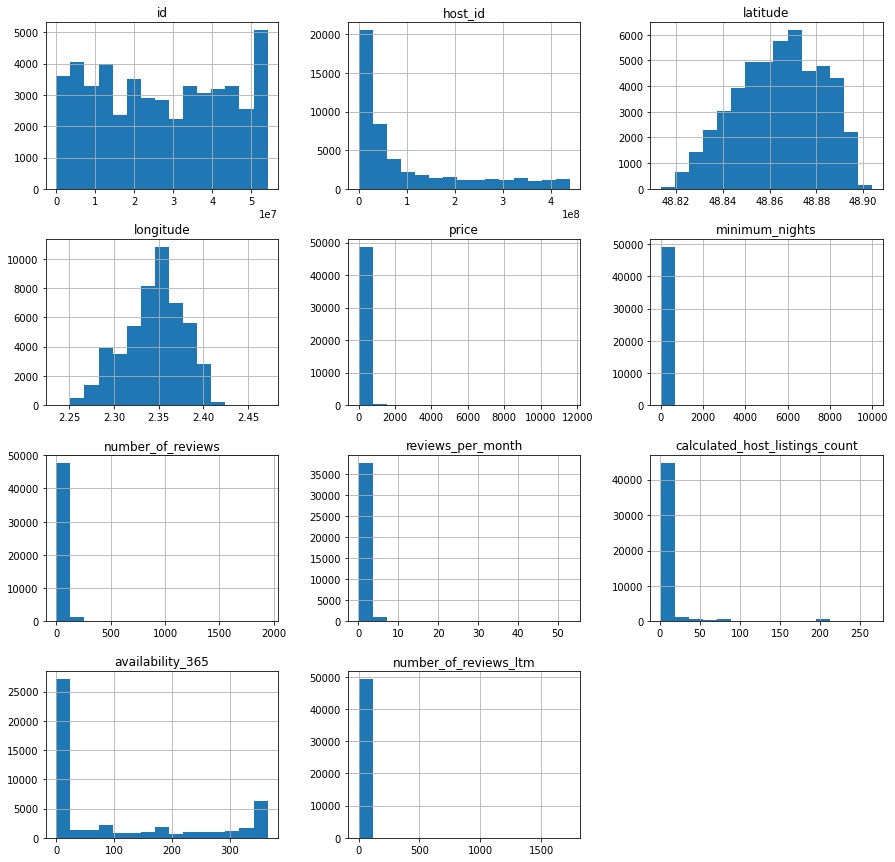

In [ ]:
# plotar o histograma das variáveis numéricas
df2.hist(bins=15, figsize = (15,15));


Repare bem a variável de `price` e `minimum_nights`: para essas duas, a possibilidade de termos um *outlier* é imensa. Já que, sejamos razoáveis, existem poucas chances de um imóvel ser alugado por quase EUR 12.000,00 a diária.

Bem como também termos um número mínimo de noites ser quase 10.000. 

Podemos ainda, estudar a quantidade de imóveis que possuem uma baixa (por vezes zero) dias disponíveis do ano com a variável `availability_365`.
 

#### Analisando os dados estatisticos do dataframe

In [ ]:
df2.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.925500e+04,4.925500e+04,49255.000000,49255.000000,49255.000000,49255.000000,49255.000000,39001.000000,49255.000000,49255.000000,49255.000000
mean,2.705569e+07,1.003104e+08,48.864027,2.344815,128.662958,107.989524,22.001746,0.803106,9.883118,103.157629,4.025439
std,1.649148e+07,1.223133e+08,0.018166,0.033069,228.886467,168.112081,46.790986,1.181524,33.269320,136.944962,13.453797
min,5.396000e+03,2.626000e+03,48.813380,2.235490,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.243887e+07,1.377774e+07,48.850820,2.324010,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000,0.000000
50%,2.638693e+07,3.931433e+07,48.865340,2.347880,90.000000,4.000000,6.000000,0.380000,1.000000,3.000000,0.000000
75%,4.171415e+07,1.481276e+08,48.878550,2.369130,135.000000,365.000000,22.000000,1.000000,2.000000,208.000000,3.000000
max,5.418906e+07,4.393534e+08,48.903840,2.471660,11600.000000,9999.000000,1943.000000,53.040000,265.000000,365.000000,1737.000000


####Boxplot para price

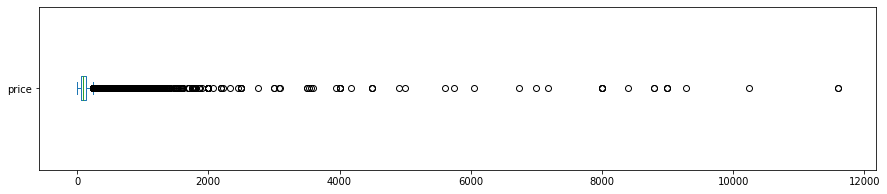

Os valores acima de EUR 800,00 por dia representam 1.971 % da nossa amostra


In [ ]:
# price
df2.price.plot(kind='box', vert = False,figsize=(15,3))
plt.show()

#ver % de valores acima de 500 para price
print("Os valores acima de EUR 500,00 por dia representam {:.3f} % da nossa amostra".format(df2[df2.price >500].count()[0] / df2.shape[0] *100))

#### Boxplot para minimum_nights

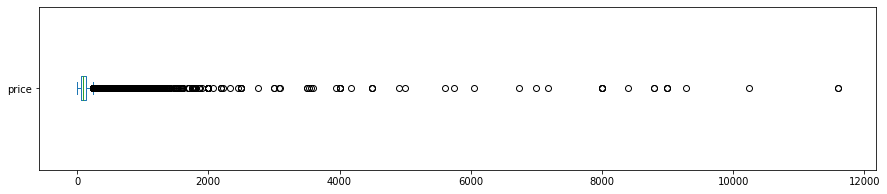

Os valores acima de 30 representam 29.81 % da nossa amostra


In [ ]:
# minimum_nights
df2.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

# ver % de valores acima de 30 
print('Os valores acima de 30 representam {:.2f} % da nossa amostra'.format(df2.query('minimum_nights>30').count()[0] / df2.shape[0] * 100
))


#### Executando a limpeza dos outliers

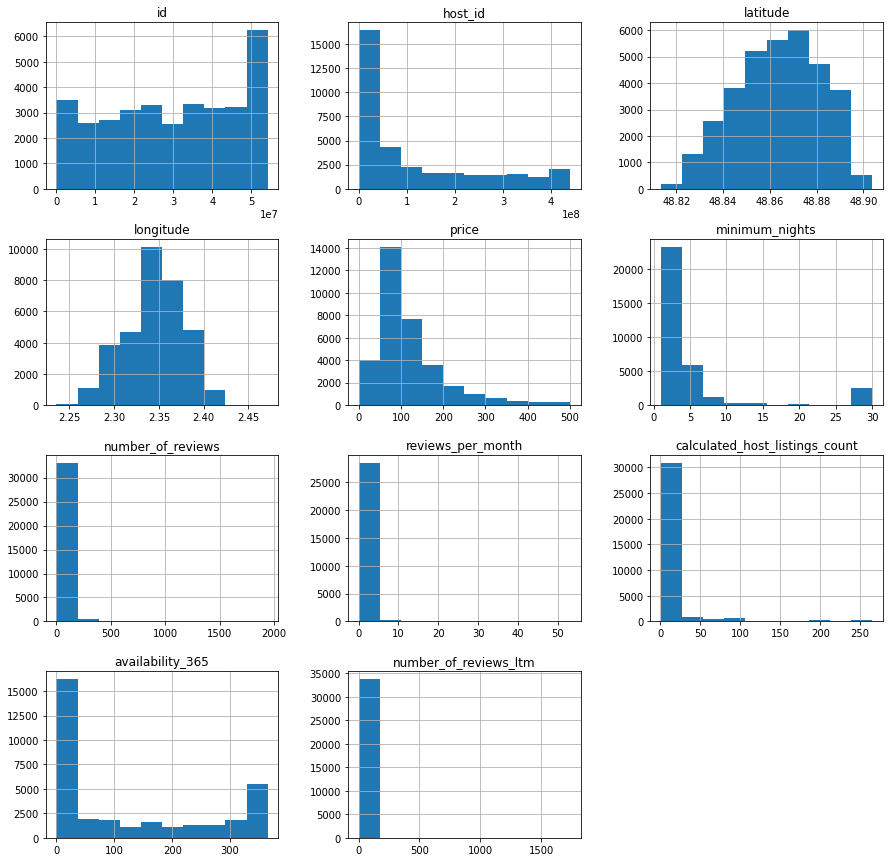

In [ ]:
# limpeza de dados
df_clean = df2.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

# plotando novo histograma
df_clean.hist(figsize = (15,15));

#### Boxplot para as após o clean up

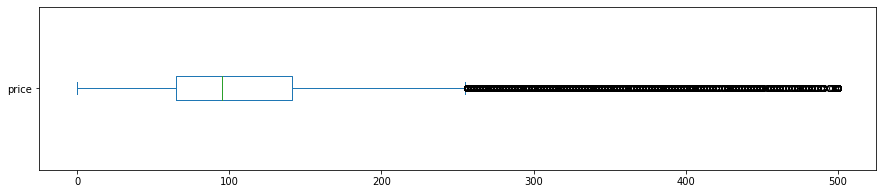

In [ ]:
# para a variavel price
df_clean.price.plot(kind = 'box', vert = False, figsize = (15,3));

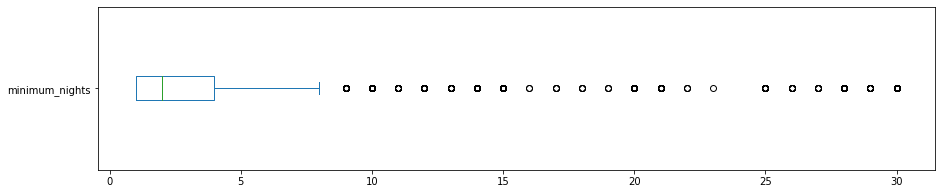

In [ ]:
# para a variavel minimum_nights
df_clean.minimum_nights.plot(kind = 'box', vert = False, figsize = (15,3));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``
print("A media de precos é de EUR {:.2f}".format(df_clean.price.mean()))

A media de precos é de EUR 117.05


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
df_clean.corr()
# mostrar a matriz de correlação


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
id,1.000000,0.519311,0.017054,-0.059664,0.063367,-0.013513,-0.373424,0.234032,0.172276,0.154888,0.048614
host_id,0.519311,1.000000,-0.029809,-0.100962,0.092485,-0.067728,-0.163842,0.184201,0.154457,0.211334,0.061278
latitude,0.017054,-0.029809,1.000000,0.087427,-0.042319,-0.028145,-0.026234,-0.018076,-0.024038,-0.041893,-0.014124
longitude,-0.059664,-0.100962,0.087427,1.000000,-0.175720,-0.040183,0.001249,-0.035955,-0.048773,-0.115557,-0.010352
price,0.063367,0.092485,-0.042319,-0.175720,1.000000,-0.073948,-0.009409,0.019169,0.157950,0.267925,0.007480
minimum_nights,-0.013513,-0.067728,-0.028145,-0.040183,-0.073948,1.000000,-0.068108,-0.147586,0.073232,0.065989,-0.110245
number_of_reviews,-0.373424,-0.163842,-0.026234,0.001249,-0.009409,-0.068108,1.000000,0.588222,-0.037097,0.123759,0.555813
reviews_per_month,0.234032,0.184201,-0.018076,-0.035955,0.019169,-0.147586,0.588222,1.000000,0.076904,0.257579,0.726817
calculated_host_listings_count,0.172276,0.154457,-0.024038,-0.048773,0.157950,0.073232,-0.037097,0.076904,1.000000,0.186943,0.040535
availability_365,0.154888,0.211334,-0.041893,-0.115557,0.267925,0.065989,0.123759,0.257579,0.186943,1.000000,0.159784


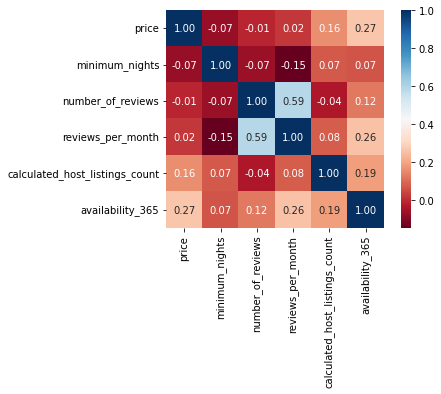

In [ ]:
# plotar um heatmap a partir das correlações
matriz_de_correlacao = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
sns.heatmap(matriz_de_correlacao, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    25499
Private room        6905
Hotel room          1001
Shared room          312
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_imovel_disponivel = df_clean.room_type.value_counts()
df_clean.room_type.value_counts()/df_imovel_disponivel.sum()

Entire home/apt    0.756265
Private room       0.204793
Hotel room         0.029688
Shared room        0.009253
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby('neighbourhood')["price"].mean().sort_values(ascending = False)


neighbourhood
Louvre                 173.197415
Élysée                 169.306483
Palais-Bourbon         158.324503
Hôtel-de-Ville         153.832911
Luxembourg             153.447140
Temple                 147.673767
Bourse                 144.121590
Passy                  142.742747
Panthéon               139.577223
Opéra                  135.490919
Vaugirard              113.815507
Batignolles-Monceau    110.972236
Entrepôt               105.644498
Popincourt             100.821170
Observatoire            98.880805
Reuilly                 93.948153
Buttes-Montmartre       93.780248
Gobelins                89.383663
Buttes-Chaumont         78.087691
Ménilmontant            77.190317
Name: price, dtype: float64

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

4.941216596968888

In [ ]:
# plotar os imóveis pela latitude-longitude


Serão considerados `x=longitude` e `y=latitude`

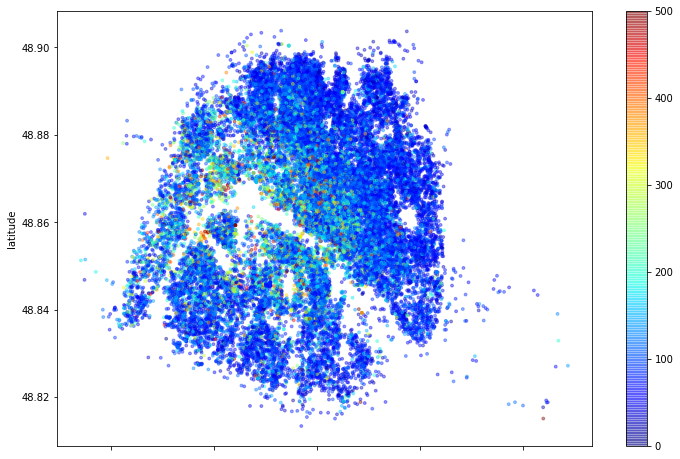

In [ ]:
df_clean.plot(kind="scatter", x='longitude', y='latitude',alpha=0.4, c= df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Ao analizar as estruturas estatísticas iniciais que compõem a Cidade Luz, podemos perceber que há,inicialmente, a coluna `neighbourhood_group` que poderia ser retirada da análise e tratativas de dados por estar totalmente em branco. 

Passsando-se ao histograma, observa-se que o número de *outliers* é bem considerável *dataset*, destacado, principalmente, nas variáveis `price` e `minimum_nights`. 

Além do mais, há baixa correlação entre as variáveis apresentadas impossibilitando realizar associações que produzam algum efeito significativo. O máximo que poderia ser associado, seria uma correlação positiva entre o número de reviews com a disponibilidade durante o ano.

Finalmente, no que tange aos bairros, *Louvre*, *Élysée* e *Palais-Bourbon* são os *arrondissements* mais caros. Evidentemente, os mais próximos dos cartões postais da cidade. 

